In [8]:
import torch
def mat_vect(x):
    A = torch.tensor([[1, 2], [3, 4]])
    A = A.repeat(10, 1, 1)
    return torch.einsum("bii, bi -> bi", A, x)
    
def trace_mat(mat_vect, B, n=128, D=False):
    """
    mat_vect: matrix vector product
    n: size of the matrix
    """
    diag = 0
    for i in range(n):
        e = torch.zeros(B, n)
        e[:, i] = 1
        diag += mat_vect(e)[:, i]
    return diag


In [10]:
trace = trace_mat(mat_vect, B=10, n=2)
trace


tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

Check the orthogonality of the projecting vectors

In [16]:
# load log
import pickle
with open('../../logs/2024-04-03-22_explicitConNumLowerTri_basisOrtho.pkl', 'rb') as f:
    log = pickle.load(f)
print(log.keys())
vect_real = log['learned_vector_real'][-1]
vect_imag = log['learned_vector_imag'][-1]


dict_keys(['epoch', 'train_loss', 'val_loss', 'train_metrics', 'val_metrics', 'TrainLoss', 'ValLoss', 'learned_vector_real', 'learned_vector_imag'])


In [29]:
vecs = vect_real + 1j*vect_imag
vecs = vecs.reshape(vecs.shape[0], -1)

ortho_mat = vecs.conj().T @ vecs
ortho_mat

array([[266.92337  -4.1623113e-07j, -32.03867  -7.5544822e-01j,
         12.874262 -3.8450577e+01j, ..., -13.261078 +4.5761337e+00j,
         50.708862 -3.0461775e+01j,  12.303552 -3.4252021e-01j],
       [-32.03867  +7.5545192e-01j, 282.07755  -1.2657711e-07j,
         11.626602 -1.6276405e+00j, ...,   3.4022899-1.3164880e+01j,
        -17.615486 -1.8179224e+01j,   3.978052 -2.0629904e+01j],
       [ 12.874262 +3.8450573e+01j,  11.626602 +1.6276389e+00j,
        282.73093  -1.7727979e-07j, ...,  23.64317  +1.6235527e+01j,
          8.133931 -1.0211066e+01j,   5.257764 +1.1645222e+01j],
       ...,
       [-13.261078 -4.5761328e+00j,   3.4022899+1.3164882e+01j,
         23.64317  -1.6235527e+01j, ..., 263.21317  -4.3454170e-07j,
         28.45188  -1.5056725e+01j,  26.439222 -7.7355762e+00j],
       [ 50.708862 +3.0461775e+01j, -17.615486 +1.8179218e+01j,
          8.133931 +1.0211066e+01j, ...,  28.45188  +1.5056721e+01j,
        219.1456   +3.0804262e-07j,   8.385252 +1.6971916e+01j]

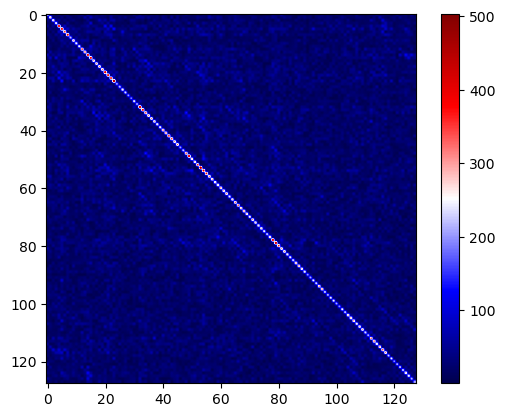

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.abs(ortho_mat), cmap='seismic')
plt.colorbar()
plt.savefig('../../figures/projecting_vector_ortho_heatmap.png', format='png', dpi=300, bbox_inches='tight')

In [34]:
# Look into DD matrices
U1_mat = np.load('../../../datasets/Dirac/precond_data/U1_mat.npy')

In [35]:
U1_mat.shape

(1600, 128, 128)

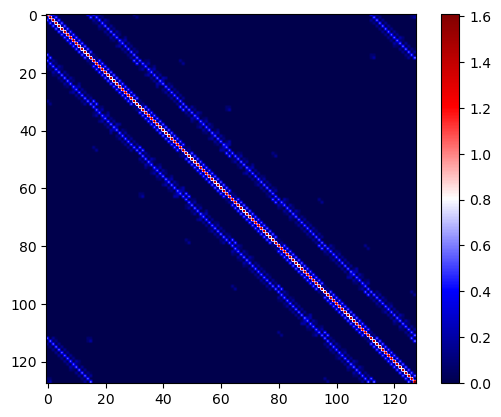

In [36]:
plt.imshow(np.abs(U1_mat[0]), cmap='seismic')
plt.colorbar()

In [37]:
for i in range(U1_mat.shape[0]):
    print(np.trace(U1_mat[i]))
    if i>20:
        break

(206.00418+4.440892e-15j)
(206.00418-3.5527137e-15j)
(206.00418+3.5527137e-15j)
(206.00418+7.1054274e-15j)
(206.00418+3.5527137e-15j)
(206.00418+0j)
(206.00418-3.5527137e-15j)
(206.00418+4.440892e-15j)
(206.00418-7.1054274e-15j)
(206.00418+7.1054274e-15j)
(206.00418-1.7763568e-15j)
(206.00418+0j)
(206.00418-1.4210855e-14j)
(206.00418-1.3322676e-15j)
(206.00418-1.15463195e-14j)
(206.00418+8.881784e-15j)
(206.00418+5.3290705e-15j)
(206.00418-8.881784e-16j)
(206.00418+0j)
(206.00418-1.7763568e-15j)
(206.00418-5.3290705e-15j)
(206.00418+0j)
